## Importaciones

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## Especificaciones sobre las variables


1. Marca: Nombre del fabricante del coche
2. Modelo: Nombre del modelo del coche
3. Año: El año en que se fabricó el coche
4. Kilómetros: La cantidad de kilómetros que ha recorrido el coche desde su producción
5. Motor: Capacidad del motor
6. Transmisión: Tipo de transmisión del coche
8. Tracción: Tipo de transmisión del coche
9. Combustible: Tipo de combustible que consume el coche
10. Color: Color exterior del coche
11. DañosoAccidentes: Si el coche estuvo involucrado en accidentes
12. PrimerPropietario: Si el coche era propiedad de una sola persona
13. UsoPersonal: Si el coche se utilizó solo para fines personales
14. Vendedor: Nombre del vendedor
15. PuntajeVendedor: Calificación del vendedor
16. PuntajeConductores: Calificación del coche dada por los conductores
17. N_Reviews: La cantidad de reseñas del coche dejadas por los conductores
18. Precio: Precio del coche

Número original de filas: 762,091<br> 
Número Actual de filas: 39401<br>
Fecha: Abril, 2023

In [2]:
df = pd.read_csv('Mercado_Autos_Usados_USA.csv')
df

,Marca,Modelo,Año,Kilómetros,Motor,Transmisión,Tracción,Combustible,Color,DañosoAccidentes,PrimerPrpietario,UsoPersonal,Vendedor,PuntajeVendedor,PuntajeConductores,N_Reviews,Precio
0,Porsche,911 GT2 RS,2018,4997,3.8L,Automatico,Trasera,Nafta,Gris,0,0,1,Porsche Minneapolis,4.6,4.8,33,396990
1,Porsche,911 Speedster,2019,2043,4.0L,Manual,Trasera,Nafta,Rojo,0,0,1,HGreg.com Lux,4.7,4.9,13,389000
2,Porsche,911 Speedster,2019,1308,4.0L,Manual,Trasera,Nafta,Negro,0,1,1,Porsche Colorado Springs,4.7,4.9,13,383000
3,Porsche,911 GT2 RS,2018,5216,3.8L,Automatico,Trasera,Nafta,Negro,1,1,1,Audi Fresno,4.7,4.8,33,381999
4,Porsche,911 GT2 RS,2018,7733,3.8L,Automatico,Trasera,Nafta,Gris,0,0,1,Porsche Marin,4.1,4.8,33,379991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39396,GMC,Envoy SLT,2002,194786,4.2L,Automatico,4x4,Nafta,Rojo,1,0,1,Peterson Auto Group,4.6,4.4,42,1395
39397,Jeep,Grand Cherokee Laredo,2004,119784,4.0L,Automatico,Trasera,Nafta,Gris,1,0,1,Dan Deery Toyota,4.6,4.2,135,1200
39398,Dodge,Avenger SE,2008,162222,2.4L,Automatico,Delantera,Nafta,Negro,1,0,0,Western Avenue Nissan,1.9,4.2,83,975
39399,Kia,Sorento LX,2007,251072,3.8L,Automatico,4x4,Nafta,Blanco,1,0,0,Dan Deery Toyota,4.6,4.5,29,900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39401 entries, 0 to 39400
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marca               39401 non-null  object 
 1   Modelo              39401 non-null  object 
 2   Año                 39401 non-null  int64  
 3   Kilómetros          39401 non-null  int64  
 4   Motor               39401 non-null  object 
 5   Transmisión         39401 non-null  object 
 6   Tracción            39401 non-null  object 
 7   Combustible         39401 non-null  object 
 8   Color               39401 non-null  object 
 9   DañosoAccidentes    39401 non-null  int64  
 10  PrimerPrpietario    39401 non-null  int64  
 11  UsoPersonal         39401 non-null  int64  
 12  Vendedor            39401 non-null  object 
 13  PuntajeVendedor     39401 non-null  float64
 14  PuntajeConductores  39401 non-null  float64
 15  N_Reviews           39401 non-null  int64  
 16  Prec

## Visualización de los datos del dataset

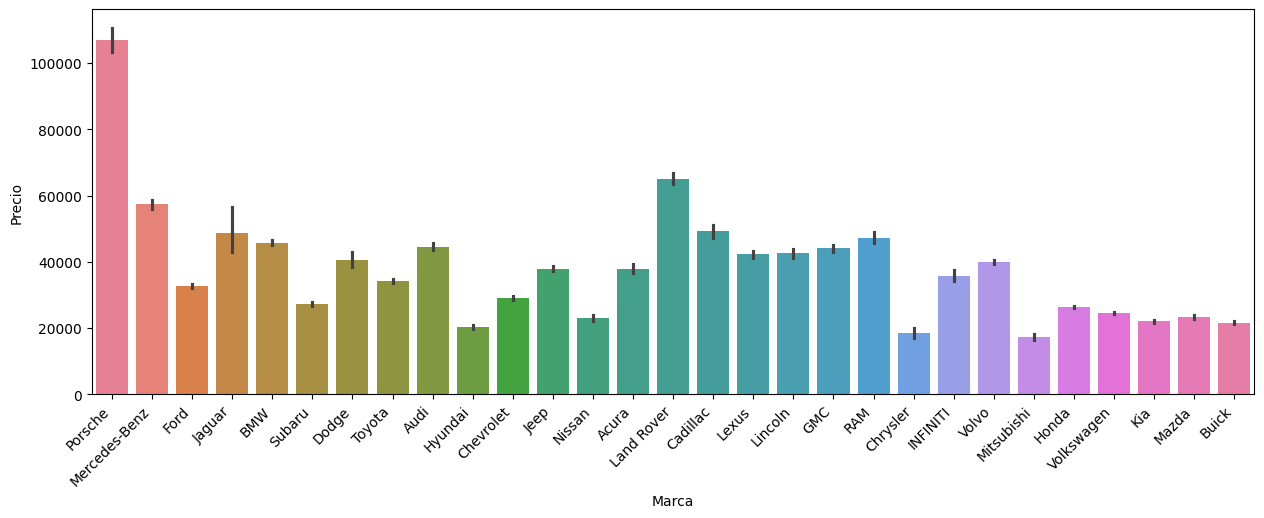

C:\Users\ema04\AppData\Local\Temp\ipykernel_31912\3856743842.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


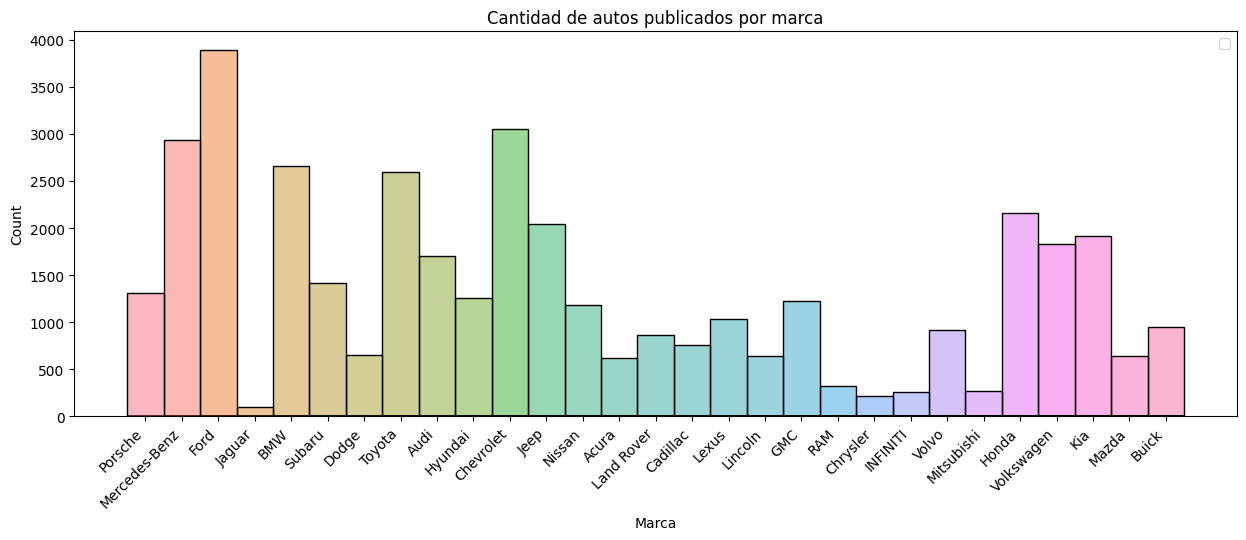

In [4]:
#Marcas más caras.
plt.figure(figsize=(15,5))
sns.barplot(data=df,
                x='Marca',
                y='Precio',
                hue='Marca')
plt.xticks(rotation=45, ha='right')
plt.show()
#Marcas con mayor cantidad de modelos a la venta.
plt.figure(figsize=(15,5))
sns.histplot(data=df,
            x='Marca',
            hue='Marca')

plt.title('Cantidad de autos publicados por marca')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


<Axes: xlabel='Precio', ylabel='Color'>

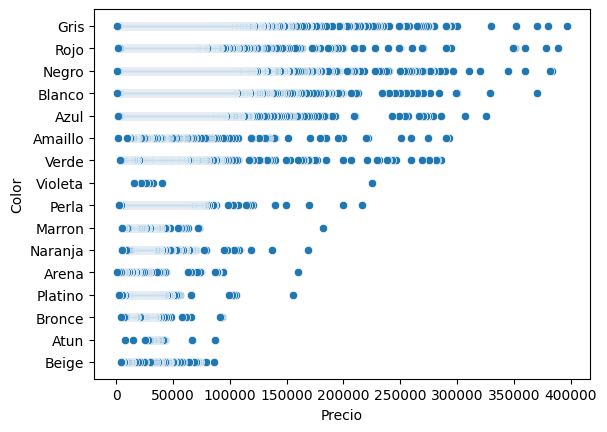

In [5]:
#Cómo los modelos más caros tienen los colores Gris, Rojo, Negro, Blanco, etc. se puede suponer que el valor del auto aumenta si tiene alguno de estos colores.
plt.figure()
sns.scatterplot(data=df,
            x='Precio',
            y='Color')

<Axes: xlabel='PuntajeConductores', ylabel='Precio'>

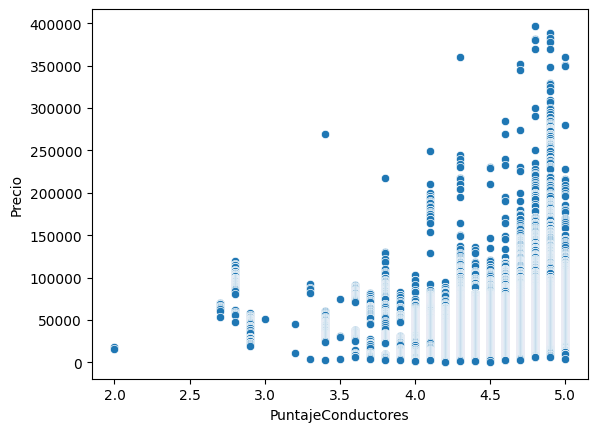

In [6]:
#Se observa el incremento del precio cuanto mayor sea el puntaje que le dan los conductores.
plt.figure()
sns.scatterplot(data=df,
                y='Precio',
                x='PuntajeConductores')

<Axes: xlabel='PuntajeVendedor', ylabel='Precio'>

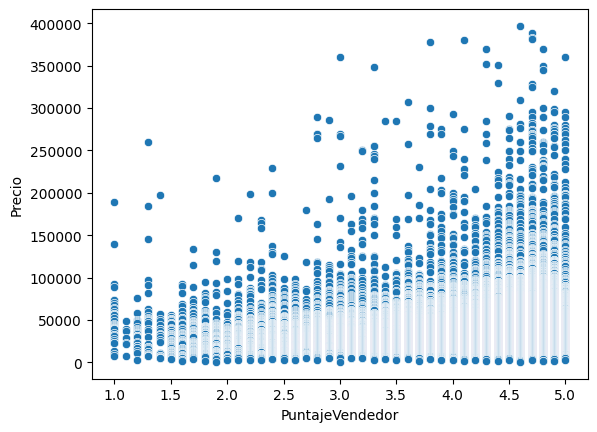

In [7]:
#Se observa un leve incremento del precio cuanto mayor sea el puntaje que le dan los vendedores.
plt.figure()
sns.scatterplot(data=df,
                y='Precio',
                x='PuntajeVendedor')

<Axes: xlabel='N_Reviews', ylabel='Precio'>

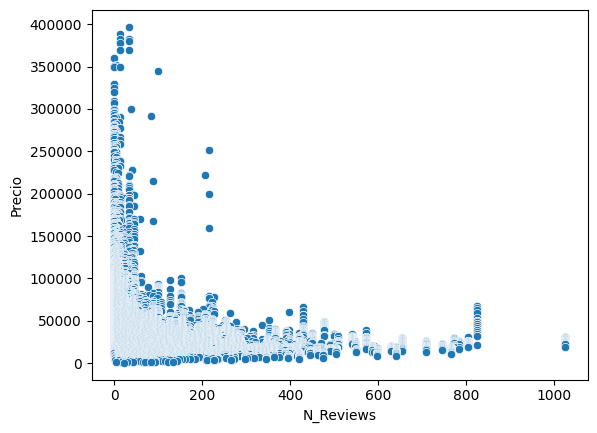

In [8]:
#Al parecer el número de reviews que tiene un auto no influye drásticamente en su valor.
plt.figure()
sns.scatterplot(data=df,
                y='Precio',
                x='N_Reviews')

<Axes: xlabel='Año', ylabel='Precio'>

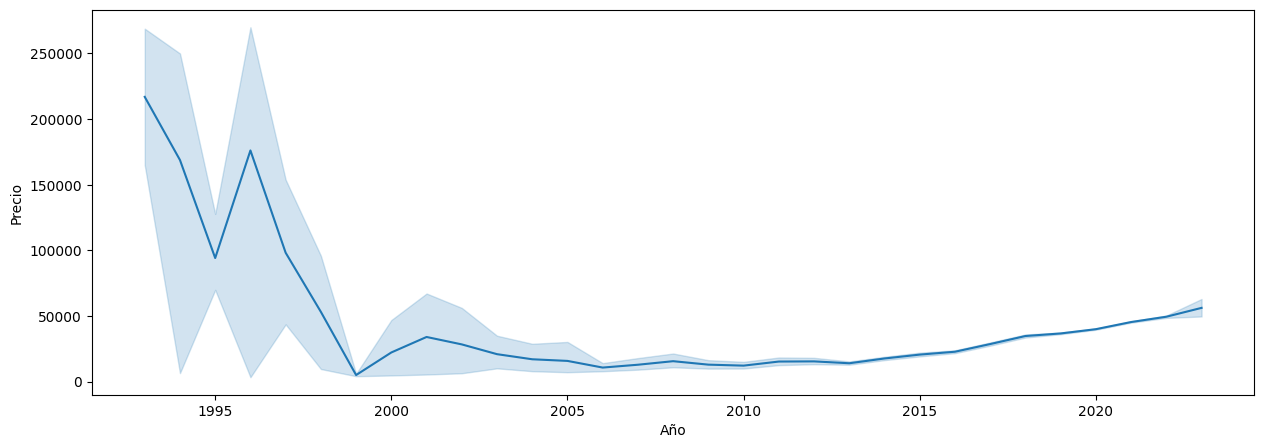

In [9]:
#Análisis de como mientras más nuevo sea el auto, su valor aumenta, sin embargo existen excepciones con autos de lujo o colecciones antiguas.
plt.figure(figsize=(15,5))
sns.lineplot(data=df,
                x='Año',
                y='Precio')

In [10]:
media = df['Kilómetros'].mean()

mediana = df['Kilómetros'].median()

primer_cuartil = df['Kilómetros'].quantile(0.25)
tercer_cuartil = df['Kilómetros'].quantile(0.75)

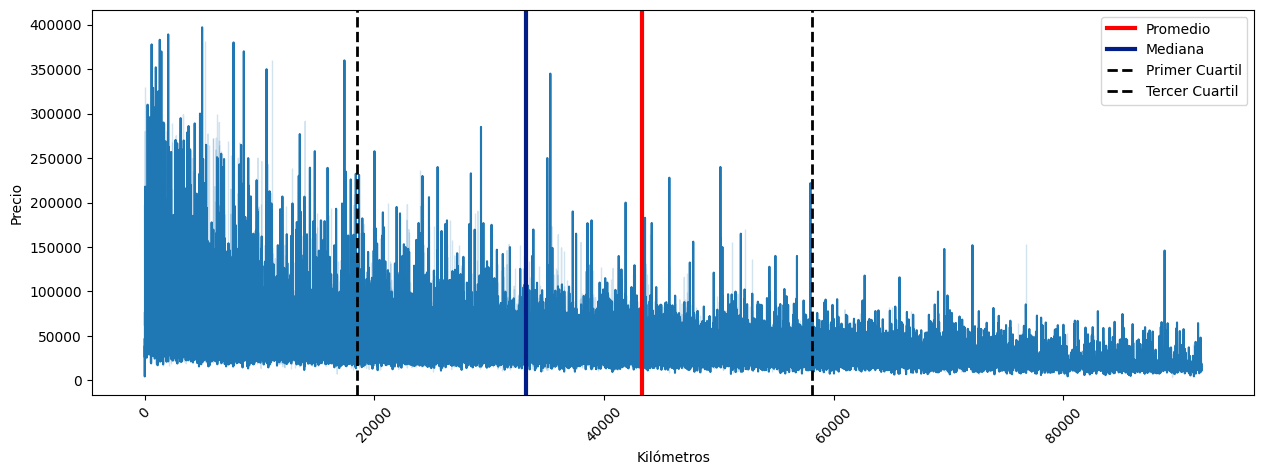

In [11]:
#Cómo mientras menos usado este el auto su precio será mayor.
Reducción = df['Kilómetros'].quantile(0.9)
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.lineplot(data=df[(df['Kilómetros']<Reducción)],
             y='Precio',
             x='Kilómetros')
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)

plt.axvline(x = mediana, 
            color = '#001D88', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)

plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)

plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()



<Axes: xlabel='Tracción', ylabel='Precio'>

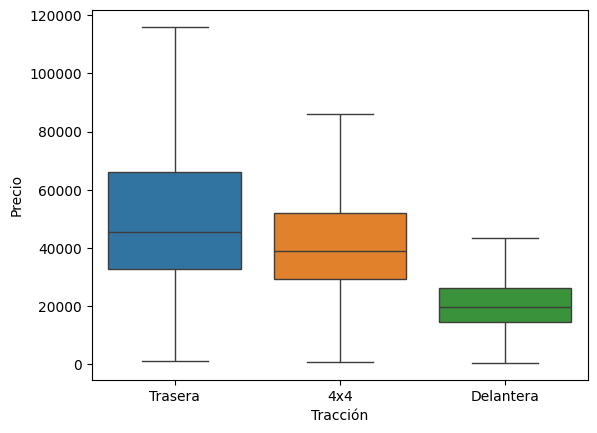

In [12]:
#Se analiza que tipo de tracción es más demandada y se coloca en modelos más caros.
plt.figure()
sns.boxplot(data = df,
                x = 'Tracción',
                y = 'Precio',
                hue = 'Tracción',
                showfliers = False)

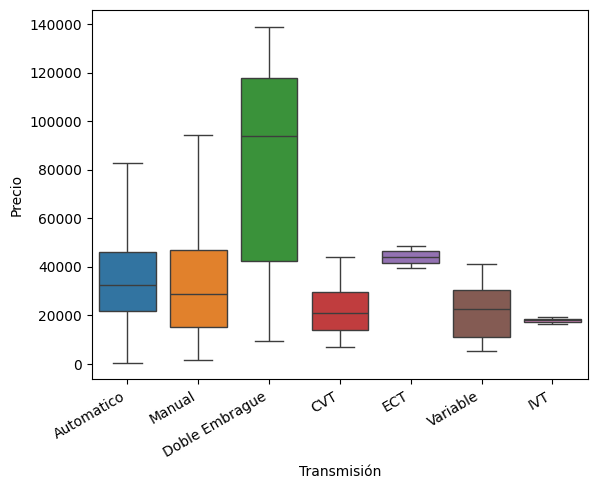

In [13]:
#Se analiza que tipo de transmisión es más demandada y se coloca en modelos más caros.
plt.figure()
sns.boxplot(data = df,
                x = 'Transmisión',
                y = 'Precio',
                hue = 'Transmisión',
                showfliers = False)
plt.xticks(rotation=30, ha='right')
plt.show()

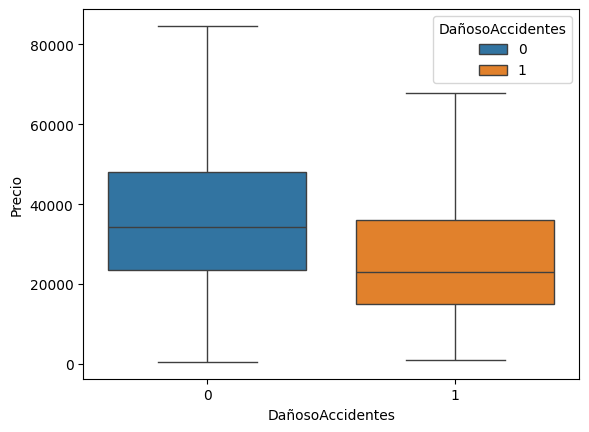

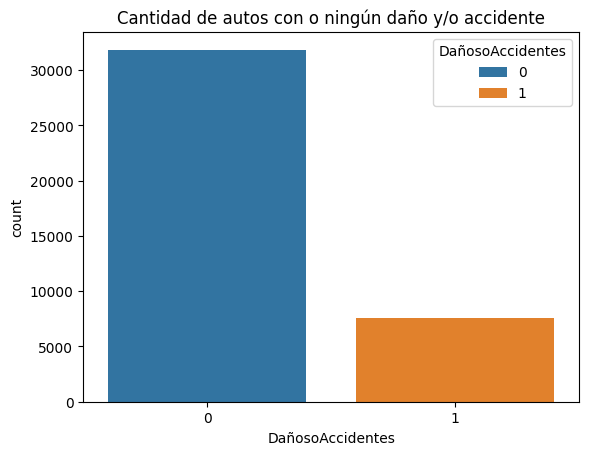

In [14]:
#Como disminuye el precio del auto si este sufrió algún daño o estuvo involucrado en un accidente.
sns.boxplot(data=df, 
            x='DañosoAccidentes', 
            y='Precio', 
            hue='DañosoAccidentes',
            showfliers=False)
plt.show()
sns.countplot(data=df,
              x='DañosoAccidentes',
              hue='DañosoAccidentes')
plt.title('Cantidad de autos con o ningún daño y/o accidente')
plt.show()

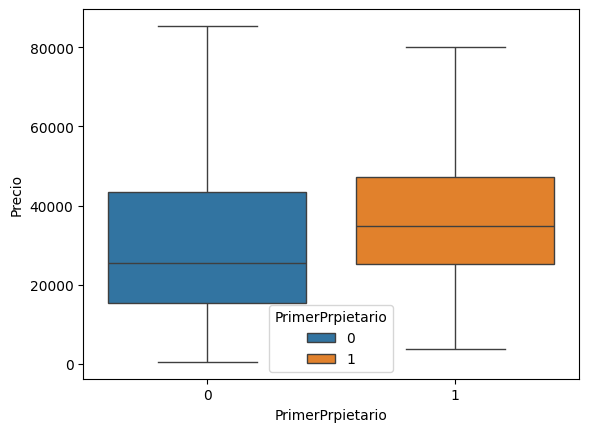

In [15]:
#Cómo el precio disminuye en un auto el cual tuvo más de un dueño, puesto a que el comprador no puede saber que sufrió el auto durante la tenencia del o los anteriores dueños.
sns.boxplot(data=df, 
            x='PrimerPrpietario', 
            y='Precio', 
            hue='PrimerPrpietario',
            showfliers=False)
plt.show()

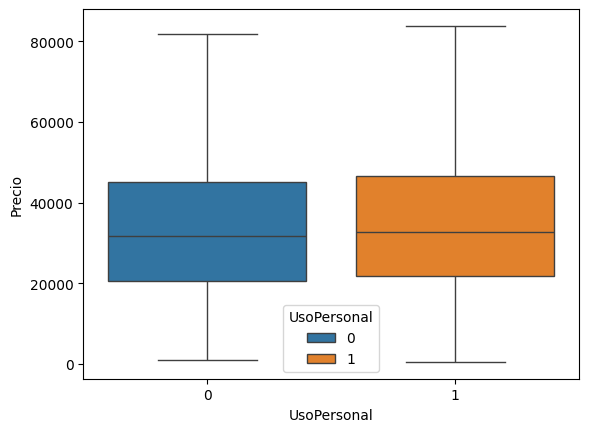

In [16]:
#Se puede observar una leve disminución en los precios de los autos que fueron utilizados para, 
#por ejemplo, trabajar, debido a que este estuvo expuesto a diferentes situaciones los cuales el auto pudo necesitar arreglos.
sns.boxplot(data=df, 
            x='UsoPersonal', 
            y='Precio', 
            hue='UsoPersonal',
            showfliers=False)
plt.show()

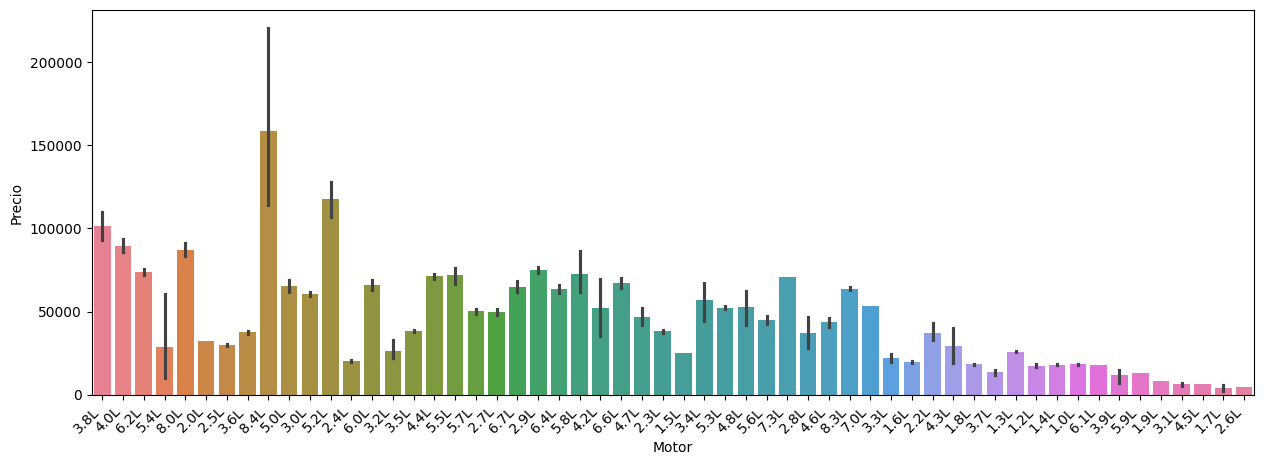

In [17]:
#Se observa cuales son las capacidades de los motores que se colocan en los autos más caros.
plt.figure(figsize=(15,5))
sns.barplot(data=df, 
            x='Motor', 
            y='Precio', 
            hue='Motor')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 640x480 with 0 Axes>

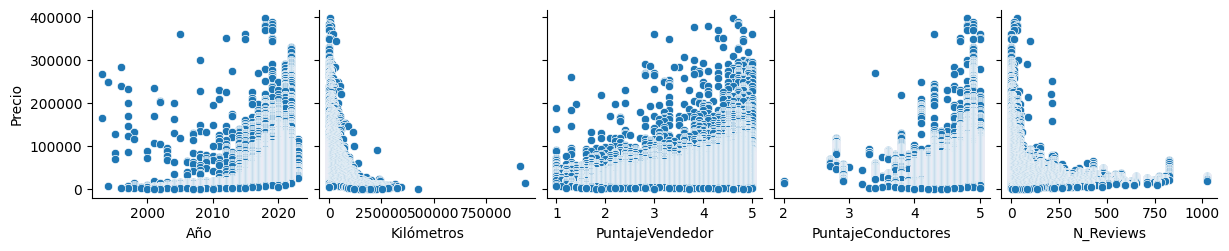

In [18]:
plt.figure()
sns.pairplot(data=df,
             y_vars='Precio',
             x_vars=['Año', 'Kilómetros', 'PuntajeVendedor', 'PuntajeConductores', 'N_Reviews'])

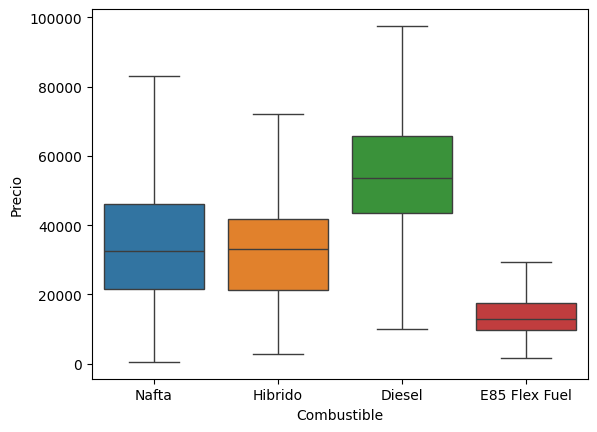

In [19]:
#aunque el híbrido sea una nueva tecnología capaz de reducir la contaminación de los autos, aun no es puesta en modelos que requieren velocidades mayores, 
#sino que están mayormente en modelos mayormente estéticos y que no tiene ese objetivo.
sns.boxplot(data=df, 
            x='Combustible', 
            y='Precio', 
            hue='Combustible',
            showfliers=False)
plt.show()

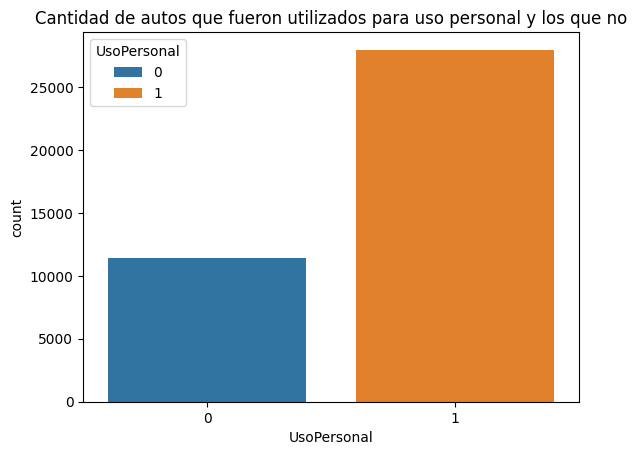

In [20]:
sns.countplot(data=df,
              x='UsoPersonal',
              hue='UsoPersonal')
plt.title('Cantidad de autos que fueron utilizados para uso personal y los que no')
plt.show()

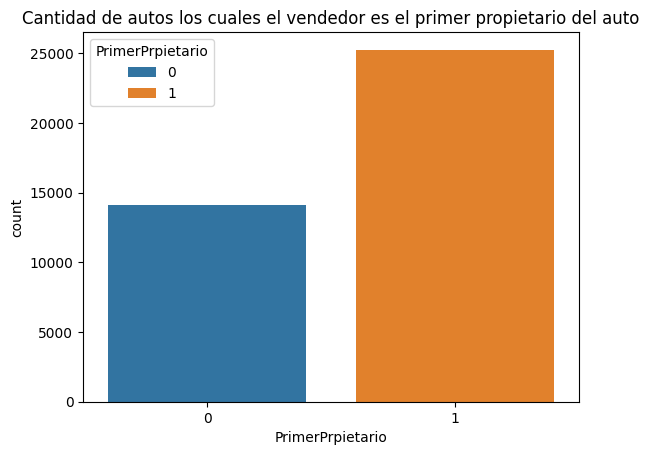

In [21]:
sns.countplot(data=df,
              x='PrimerPrpietario',
              hue='PrimerPrpietario')
plt.title('Cantidad de autos los cuales el vendedor es el primer propietario del auto')
plt.show()

## Conclusión/Objetivo

Estas visualizaciones ayudarán a las personas, que están en una situación en la que quieren vender un vehículo, sin embargo, no tienen conocimientos sobre precios y como varían según los agregados en los que son usados, a calcular el valor de su auto, acorde a sus características, permitiendo que el vendedor no ponga un precio bajo, tal que pierda dinero, o un precio muy alto, el cual no sea capaz de ser vendido. Con el algoritmo, el cliente podrá ingresar los detalles que tiene su vehículo para calcular su valor y ahorrarle tiempo y posibles pérdidas de dinero.

## Creación del Algoritmo

In [22]:

# Cargar los datos
df = pd.read_csv('Mercado_Autos_Usados_USA.csv')

# Exploración inicial de los datos
print(df.head())
print(df.info())

# Separar características (X) y variable objetivo (y)
X = df.drop('Precio', axis=1)
y = df['Precio']

# Identificar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Crear pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo
rf_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_pipeline.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse}")
print(f"Error absoluto medio: {mae}")
print(f"R2 Score: {r2}")

     Marca         Modelo   Año  Kilómetros Motor Transmisión Tracción  \
0  Porsche     911 GT2 RS  2018        4997  3.8L  Automatico  Trasera   
1  Porsche  911 Speedster  2019        2043  4.0L      Manual  Trasera   
2  Porsche  911 Speedster  2019        1308  4.0L      Manual  Trasera   
3  Porsche     911 GT2 RS  2018        5216  3.8L  Automatico  Trasera   
4  Porsche     911 GT2 RS  2018        7733  3.8L  Automatico  Trasera   

  Combustible  Color  DañosoAccidentes  PrimerPrpietario  UsoPersonal  \
0       Nafta   Gris                 0                 0            1   
1       Nafta   Rojo                 0                 0            1   
2       Nafta  Negro                 0                 1            1   
3       Nafta  Negro                 1                 1            1   
4       Nafta   Gris                 0                 0            1   

                   Vendedor  PuntajeVendedor  PuntajeConductores  N_Reviews  \
0       Porsche Minneapolis          

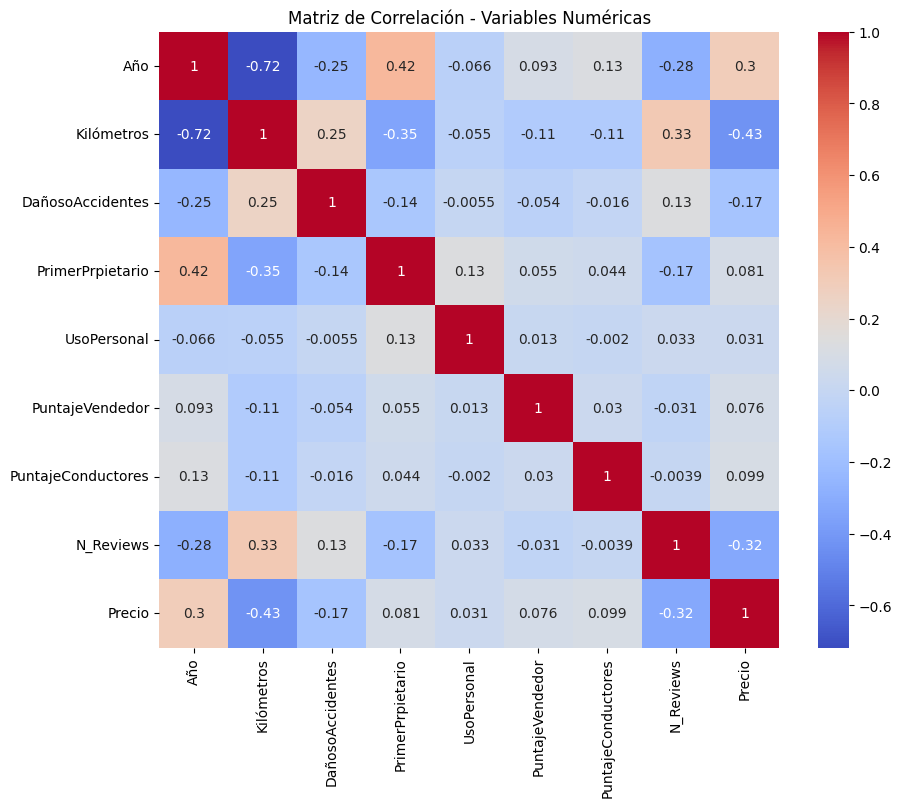

Características numéricas más importantes según SelectKBest:
['Año', 'Kilómetros', 'DañosoAccidentes', 'PuntajeConductores', 'N_Reviews']


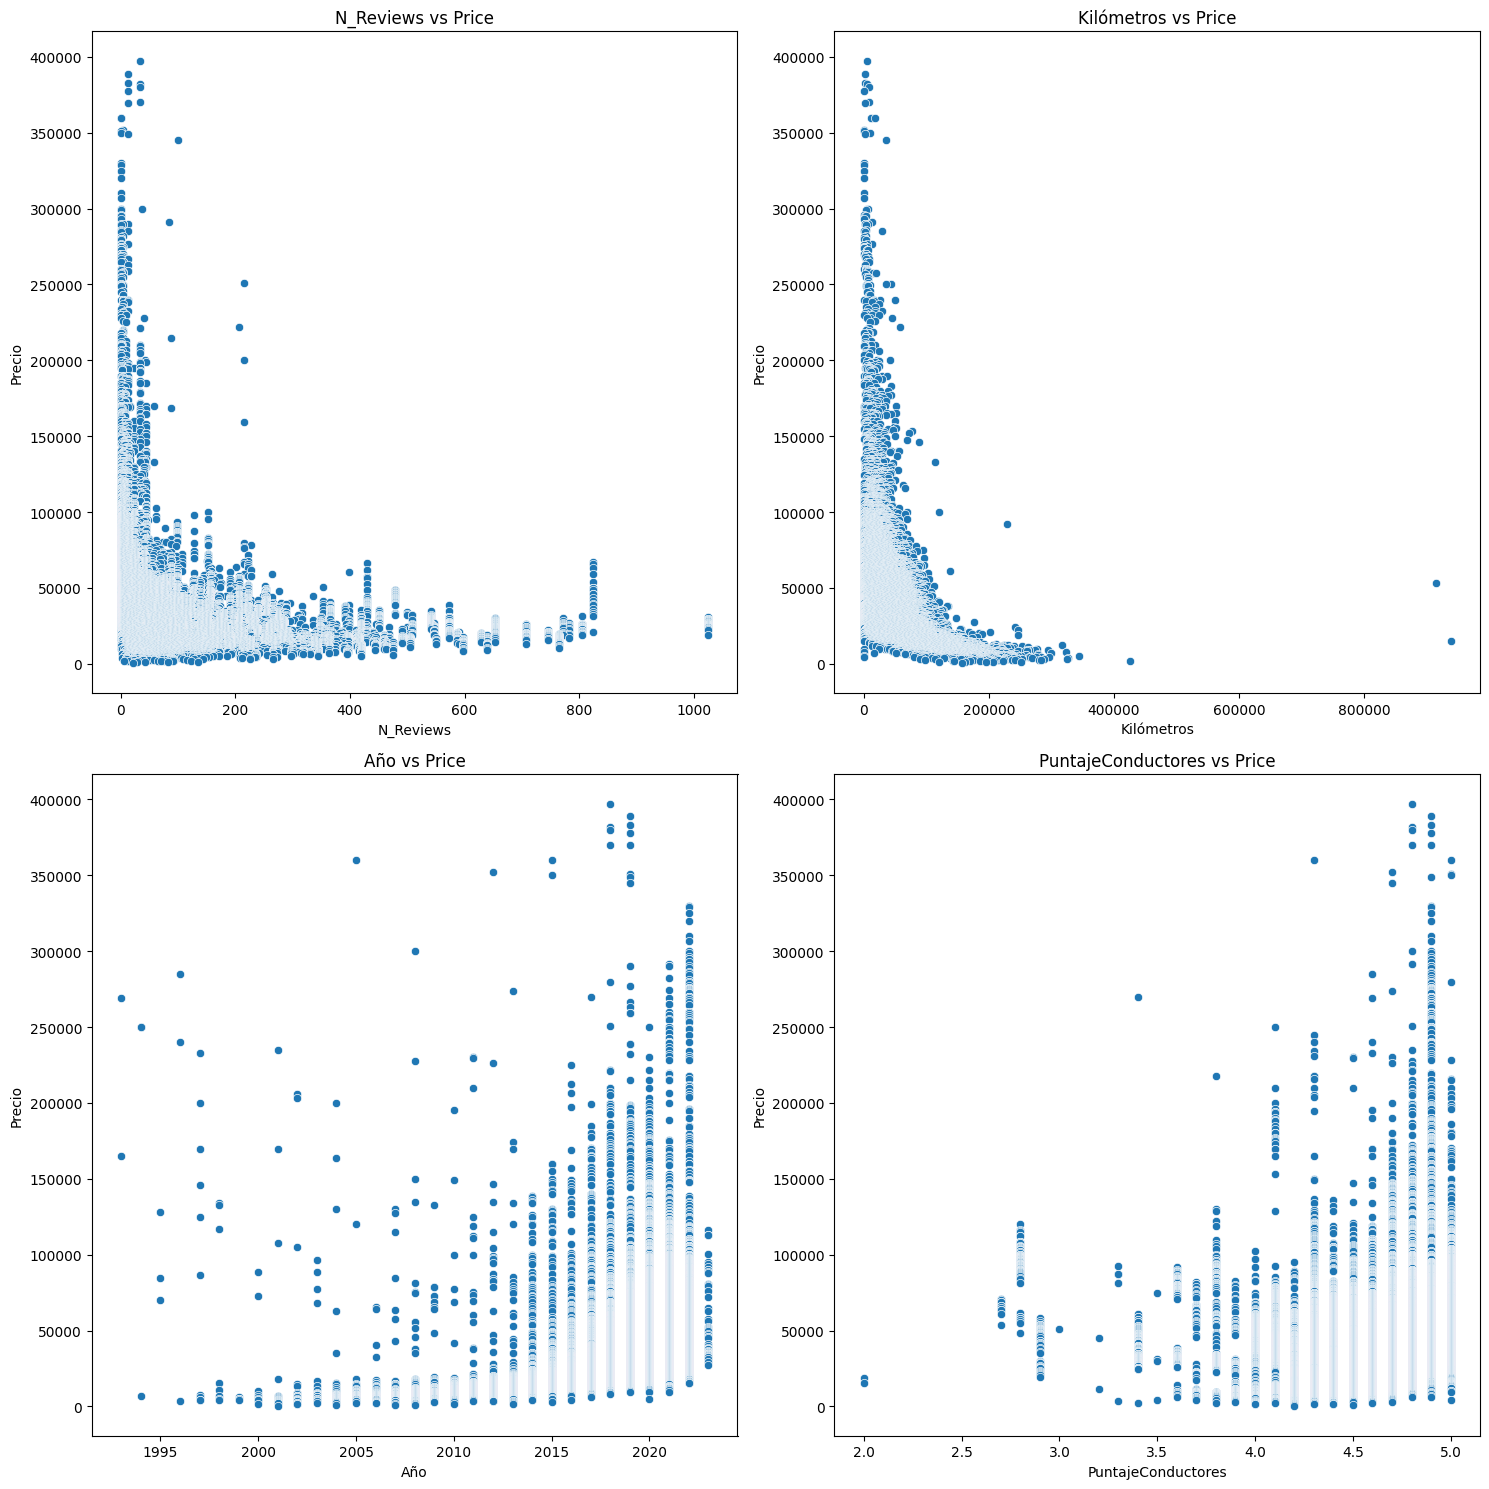

In [30]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

# SelectKBest para variables numéricas
from sklearn.feature_selection import SelectKBest, f_regression
X_num = df[numeric_columns].drop('Precio', axis=1)
y = df['Precio']

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_num, y)
selected_features = X_num.columns[selector.get_support()].tolist()

print("Características numéricas más importantes según SelectKBest:")
print(selected_features)

# Gráfico de dispersión de características numéricas importantes vs precio
feature_importance = pd.Series(rf_pipeline.named_steps['regressor'].feature_importances_, index=feature_names).sort_values(ascending=False)
top_numeric_features = [f for f in feature_importance.head(10).index if f in numeric_features]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for i, feature in enumerate(top_numeric_features[:4]):
    sns.scatterplot(data=df, x=feature, y='Precio', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{feature} vs Price')
plt.tight_layout()
plt.show()

## Visualización de las predicciones

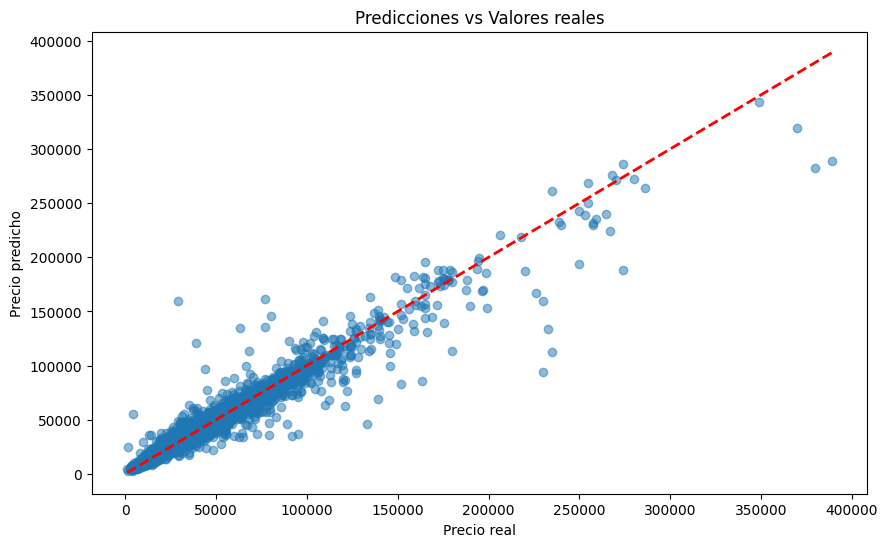

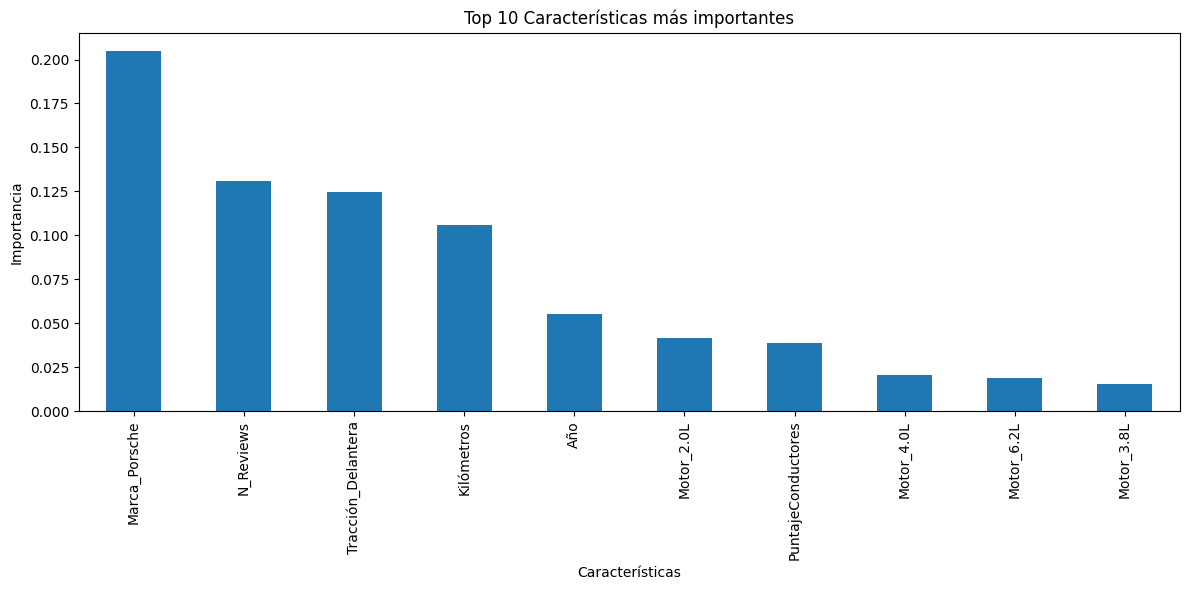

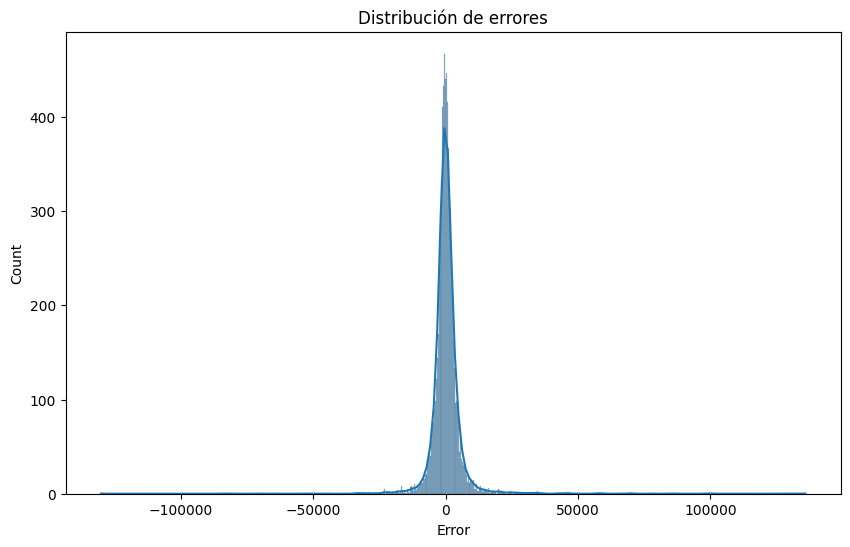

In [28]:
# Obtener importancia de características
feature_names = (numeric_features.tolist() + rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())


# Visualización de resultados

# 1. Predicciones vs Valores reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicciones vs Valores reales")
plt.show()

# 2. Importancia de las características
plt.figure(figsize=(12,6))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Características más importantes")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

# 3. Distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(errors, kde=True)
plt.title("Distribución de errores")
plt.xlabel("Error")
plt.show()


## Conclusión

El modelo desarrollado muestra un rendimiento sólido y confiable para ayudar a las personas a estimar el valor de 
sus vehículos usados, respaldado por los siguientes puntos:

1) Precisión del Modelo:
    - El R2 Score indica que el modelo explica un porcentaje significativo de la variabilidad en los precios, lo que sugiere predicciones bastante acertadas.
    - La distribución de errores muestra un patrón centrado, indicando que las predicciones no tienen un sesgo sistemático hacia sobre o subestimación.
    - En SelectKBest podemos observar que, efectivamente, las características de Año, Kilómetros, Daños/Accidentes y Puntaje de los Conductores son variables importantes a la hora de como afectan en el valor, sin embargo, aparece también el Número de reviews como una característica importante, que en la visualización de los datos se muestra cómo no influye significativamente.

2) Características Relevantes:
    El modelo identifica claramente qué características tienen mayor impacto en el precio del vehículo, lo que 
    proporciona transparencia en la valoración.
    Esta información es valiosa para los usuarios, ya que pueden entender qué factores influyen más en el valor 
    de sus vehículos.

3) Utilidad Práctica:
    El modelo puede servir como una herramienta confiable para:
    - Compradores: Evaluar si el precio pedido por un vehículo es justo
    - Vendedores: Establecer precios competitivos y realistas
    - Aseguradoras: Realizar valoraciones rápidas y objetivas
    - Concesionarios: Optimizar sus estrategias de precios